In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse
import seaborn as sns

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

import warnings
warnings.filterwarnings(action="ignore")

In [2]:
heart = pd.read_csv("cleveland.csv")
heart.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.000,1.000,1.000,145.000,233.000,1.000,2.000,150.000,0.000,2.300,3.000,0.0,6.0,negative
1,37.000,1.000,3.000,130.000,250.000,0.000,0.000,187.000,0.000,3.500,3.000,0.0,3.0,negative
2,41.000,0.000,2.000,130.000,204.000,0.000,2.000,172.000,0.000,1.400,1.000,0.0,3.0,negative


In [3]:
heart["num"] = pd.get_dummies(heart.num, drop_first=True)
heart.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.000,1.000,1.000,145.000,233.000,1.000,2.000,150.000,0.000,2.300,3.000,0.0,6.0,0
1,37.000,1.000,3.000,130.000,250.000,0.000,0.000,187.000,0.000,3.500,3.000,0.0,3.0,0
2,41.000,0.000,2.000,130.000,204.000,0.000,2.000,172.000,0.000,1.400,1.000,0.0,3.0,0


In [4]:
heart["thal"] = pd.to_numeric(heart["thal"],errors='coerce')
heart["ca"] = pd.to_numeric(heart["thal"],errors='coerce')

In [5]:
heart.dropna(axis=0, inplace=True)

cancer ratio : %7.39
healthy ratio     : %92.61


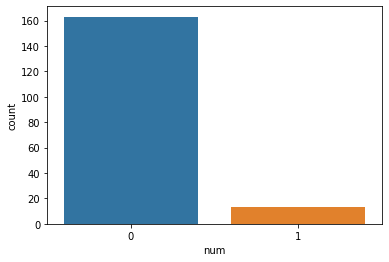

In [6]:
sns.countplot(heart.num)

print("cancer ratio : %{:.2f}".format(sum(heart.num)/len(heart.num)*100))
print("healthy ratio     : %{:.2f}".format((len(heart.num)-sum(heart.num))/len(heart.num)*100))

In [7]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [8]:
def create_model(X, y):
    X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.20, random_state=111, stratify = y)
    
    logreg_model = LogisticRegression()
    logreg_model.fit(X_train, y_train)

    pred_train = logreg_model.predict(X_train)
    pred_test = logreg_model.predict(X_test)
    
    conf_mtx_train = confusion_matrix(y_train, pred_train)
    conf_mtx_test = confusion_matrix(y_test, pred_test)
    
    print("Accuracy : {}\n".format(logreg_model.score(X_test, y_test)))
    
    print("Train Dataset")
    print(classification_report(y_train, pred_train))
    
    print("Test Dataset")
    print(classification_report(y_test, pred_test))
    
    return  None

In [9]:
X = heart.drop('num', axis=1)
y = heart['num']

create_model(X,y)

Accuracy : 0.9166666666666666

Train Dataset
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       130
           1       0.88      0.70      0.78        10

    accuracy                           0.97       140
   macro avg       0.93      0.85      0.88       140
weighted avg       0.97      0.97      0.97       140

Test Dataset
              precision    recall  f1-score   support

           0       0.94      0.97      0.96        33
           1       0.50      0.33      0.40         3

    accuracy                           0.92        36
   macro avg       0.72      0.65      0.68        36
weighted avg       0.90      0.92      0.91        36



In [10]:
from sklearn.utils import resample

In [11]:
healthy = heart[heart.num == 0]
cancer = heart[heart.num == 1]

cancer_upsampled = resample(cancer,
                                 replace = True,
                                 n_samples = len(healthy),
                                 random_state = 111)

upsampled_heart = pd.concat([healthy, cancer_upsampled])
upsampled_heart.num.value_counts()

1    163
0    163
Name: num, dtype: int64

In [12]:
X = upsampled_heart.drop('num', axis=1)
y = upsampled_heart['num']

create_model(X,y)

Accuracy : 0.9545454545454546

Train Dataset
              precision    recall  f1-score   support

           0       1.00      0.92      0.96       130
           1       0.93      1.00      0.96       130

    accuracy                           0.96       260
   macro avg       0.96      0.96      0.96       260
weighted avg       0.96      0.96      0.96       260

Test Dataset
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        33
           1       0.92      1.00      0.96        33

    accuracy                           0.95        66
   macro avg       0.96      0.95      0.95        66
weighted avg       0.96      0.95      0.95        66



In [13]:
healthy = heart[heart.num == 0]
cancer = heart[heart.num == 1]

cancer_downsampled = resample(healthy,
                                 replace = True,
                                 n_samples = len(cancer),
                                 random_state = 111)

downsampled_heart = pd.concat([cancer, cancer_downsampled])
downsampled_heart.num.value_counts()

1    13
0    13
Name: num, dtype: int64

In [14]:
X = downsampled_heart.drop('num', axis=1)
y = downsampled_heart['num']

create_model(X,y)

Accuracy : 0.8333333333333334

Train Dataset
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

Test Dataset
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.75      1.00      0.86         3

    accuracy                           0.83         6
   macro avg       0.88      0.83      0.83         6
weighted avg       0.88      0.83      0.83         6



In [15]:
#conda install -c glemaitre imbalanced-learn

In [20]:
!pip install -U imbalanced-learn
!pip install imblearn
!pip install -c glemaitre imbalanced-learn
!pip install imblearn==0.0

  Using cached imbalanced_learn-0.7.0-py3-none-any.whl (167 kB)
  Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)


ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'glemaitre'


In [21]:
from imblearn.over_sampling import SMOTE

y = heart.num
X = heart.drop('num', axis=1)

sm = SMOTE(random_state=27, sampling_strategy=1.0)
X_smote, y_smote = sm.fit_sample(X, y)

In [23]:
create_model(X_smote, y_smote)

Accuracy : 0.9545454545454546

Train Dataset
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       130
           1       0.95      0.95      0.95       130

    accuracy                           0.95       260
   macro avg       0.95      0.95      0.95       260
weighted avg       0.95      0.95      0.95       260

Test Dataset
              precision    recall  f1-score   support

           0       0.94      0.97      0.96        33
           1       0.97      0.94      0.95        33

    accuracy                           0.95        66
   macro avg       0.95      0.95      0.95        66
weighted avg       0.95      0.95      0.95        66



In [24]:
from imblearn.over_sampling import ADASYN

In [25]:
y = heart.num
X = heart.drop('num', axis=1)

ad = ADASYN()
X_adasyn, y_adasyn = ad.fit_sample(X, y)

In [26]:
create_model(X_adasyn, y_adasyn)

Accuracy : 0.9696969696969697

Train Dataset
              precision    recall  f1-score   support

           0       0.98      0.94      0.96       130
           1       0.94      0.98      0.96       132

    accuracy                           0.96       262
   macro avg       0.96      0.96      0.96       262
weighted avg       0.96      0.96      0.96       262

Test Dataset
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        33
           1       0.94      1.00      0.97        33

    accuracy                           0.97        66
   macro avg       0.97      0.97      0.97        66
weighted avg       0.97      0.97      0.97        66

